In [1]:
from Bio.PDB.PDBList import PDBList
from Bio.PDB.Structure import Structure
import matplotlib.pyplot as plt
from Bio import PDB
import numpy as np
from get_structure import get_structure

In [2]:
def get_3d_distance(point1: np.array, point2: np.array) -> float:
    return np.linalg.norm(point1 - point2)

def get_residues_and_ca_atoms(structure: Structure) -> list[tuple[str, np.array]]:
    ca_atoms = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if "CA" in residue:
                    ca_atoms.append((residue.get_resname(), residue["CA"].get_coord()))
    return ca_atoms
    
def create_contact_map(structure: Structure, threshold: int | float) -> np.array:
    residues = get_residues_and_ca_atoms(structure)
    contact_map = np.zeros((len(residues), len(residues)), dtype=int)
    for idx_i, residue_i in enumerate(residues):
        for idx_j, residue_j in enumerate(residues):
            if get_3d_distance(residue_i[1], residue_j[1]) < threshold:
                contact_map[idx_i, idx_j] = 1
                contact_map[idx_j, idx_i] = 1
    return contact_map

def show_contact_map_plot(contact_map):
    plt.imshow(contact_map, cmap="Greys")

In [3]:
s = get_structure("4YWO")

Structure exists: './tmp/pdb4ywo.ent' 


In [4]:
map = create_contact_map(s, 8)

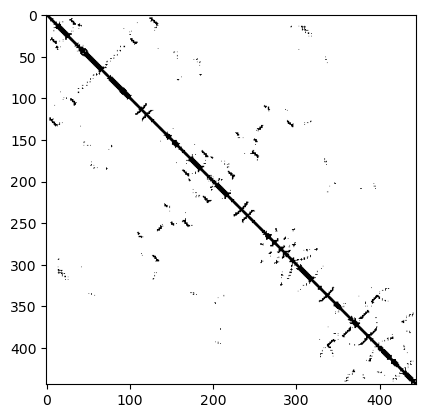

In [11]:
show_contact_map_plot(map)